dy/dt = 0 when beta = alpha(y), thus y = beta/alpha
booleans when multiplied to integers go to 0 or 1 depending on the condition

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [17]:
def dydt(X, Y, Kx, B, a):
    return B*(X > Kx) - a*Y

In [39]:
B = .1
a = .025
Kx = .5
nsteps = 250
#X = [0]*20 +[1]*(nsteps-20) #turn on X every 20 steps and stays on
X = [0]*20 + [1]*100 + [0]*130
Y = [0]

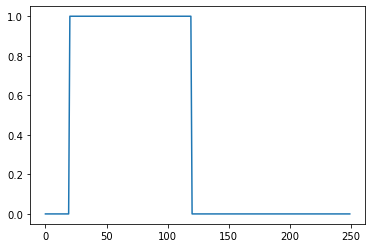

In [40]:
plt.plot(X)

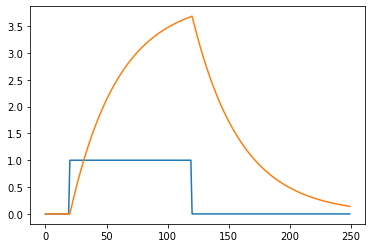

In [41]:
for i in range(nsteps-1): #nsteps-1 because already initalized first step
    ynow = Y[-1]
    xnow = X[i]
    ynew = ynow + dydt(xnow, ynow, Kx, B, a)
    Y.append(ynew)
    
plt.plot(X)
plt.plot(Y)

In [77]:
def dzdt(X, Y, Z, Kx, Ky, B, a): 
    return B*(X > (Kx and Y) < Ky) - a*Z

In [78]:
B = .1
a = .025
Kx = .5
Ky = .5
nsteps = 250
#X = [0]*20 +[1]*(nsteps-20) #turn on X every 20 steps and stays on
X = [0]*20 + [1]*100 + [0]*130 + [1]*50
Y = [0]*50 + [1]*100 + [0]*100
Z = [0]

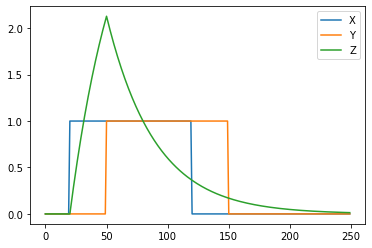

In [79]:
for i in range(nsteps-1): #nsteps-1 because already initalized first step
    xnow = X[i]
    ynow = Y[i]
    znow = Z[-1] 
    znew = znow + dzdt(xnow, ynow, znow, Kx, Ky, B, a)
    Z.append(znew)
    
plt.plot(X, label="X")
plt.plot(Y, label = "Y")
plt.plot(Z, label = "Z")
plt.legend()

Coherent feed-forward loop (FFL) implementation:

In [117]:
def dydt(X, Y, Kxy, By, ay):
    return By*(X > Kxy) - ay*Y

In [118]:
def dzdt(X, Y, Z, Kxz, Kyz, Bz, az):
    return Bz*(X > (Kxz and Y) > Kyz - az*Z)

In [107]:
By = .1
ay = .025
Bz = .1
az = .025
Kxy = .5
Kxz = .5
Kyz = .5
nsteps = 250
#X = [0]*20 +[1]*(nsteps-20) #turn on X every 20 steps and stays on
X = [0]*20 + [1]*5 + [0]*50 + [1]*75 + [0]*100
Y = [0]
Z = [0]

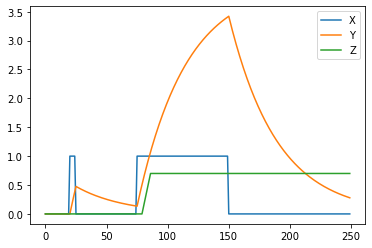

In [108]:
for i in range(nsteps - 1):
    xnow = X[i]
    ynow = Y[-1]
    znow = Z[-1]
    ynew = ynow + dydt(xnow, ynow, Kxy, By, ay)
    znew = znow + dzdt(xnow, ynow, znow, Kxz,Kyz,Bz,az)
    Y.append(ynew)
    Z.append(znew)
        
plt.plot(X, label="X")
plt.plot(Y, label = "Y")
plt.plot(Z, label = "Z")
plt.legend()

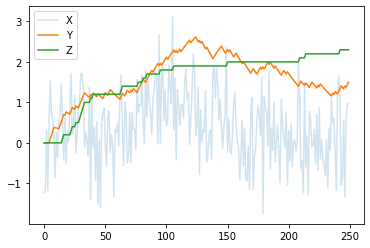

In [121]:
By = .1
ay = .025
Bz = .1
az = .025
Kxy = .5
Kxz = .5
Kyz = .5
nsteps = 250
#X = [0]*20 +[1]*(nsteps-20) #turn on X every 20 steps and stays on
#X = [0]*20 + [1]*5 + [0]*50 + [1]*75 + [0]*100
X = np.array(X) + np.random.normal(0, 0.25, size=nsteps) #adding noise to system
Y = [0]
Z = [0]

for i in range(nsteps - 1):
    xnow = X[i]
    ynow = Y[-1]
    znow = Z[-1]
    ynew = ynow + dydt(xnow, ynow, Kxy, By, ay)
    znew = znow + dzdt(xnow, ynow, znow, Kxz,Kyz,Bz,az)
    Y.append(ynew)
    Z.append(znew)
        
plt.plot(X, label="X", alpha=.2)
plt.plot(Y, label = "Y")
plt.plot(Z, label = "Z")
plt.legend()